In [1]:
from google.colab import files
uploaded = files.upload()


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')
print(f"Train set: {train.shape}, Test set: {test.shape}")
train.head(3)

Train set: (891, 12), Test set: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
# Identify missing values
print(train.isnull().sum())

# Drop Cabin (over 77% missing) and PassengerId (irrelevant)
train = train.drop(columns=['Cabin','PassengerId'])

# Fill missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Encode categorical features
train['Sex'] = train['Sex'].map({'male':1, 'female':0})
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

train.info()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(2)
memory usage: 64.5+ KB


/tmp/ipython-input-7-2983440448.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipython-input-7-2983440448.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

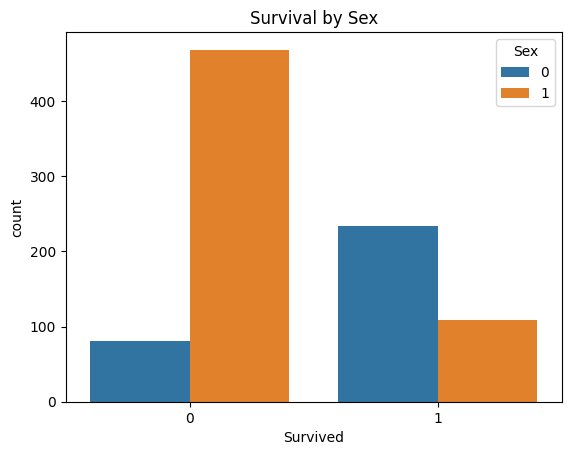

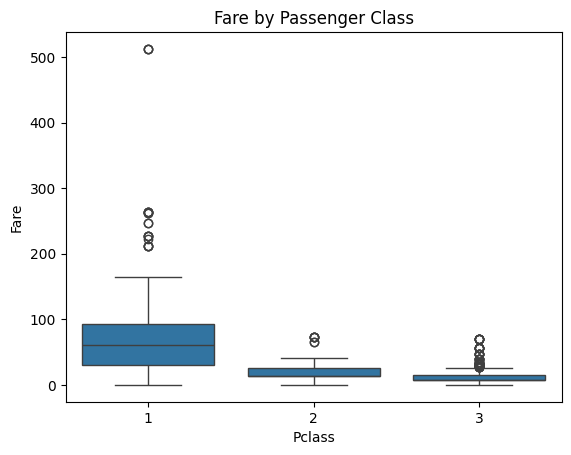

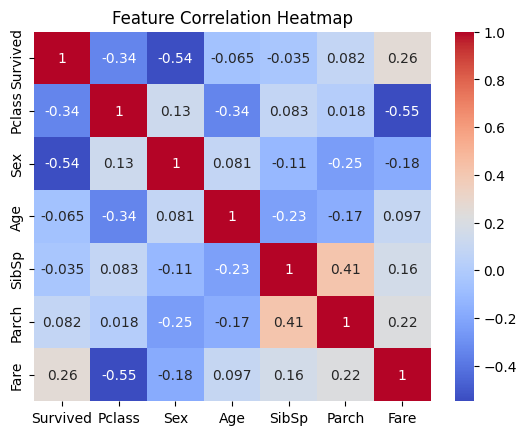

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example plots (code only, as results will be illustrated by the graphs when run)
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Sex')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title('Fare by Passenger Class')
plt.show()

corr = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


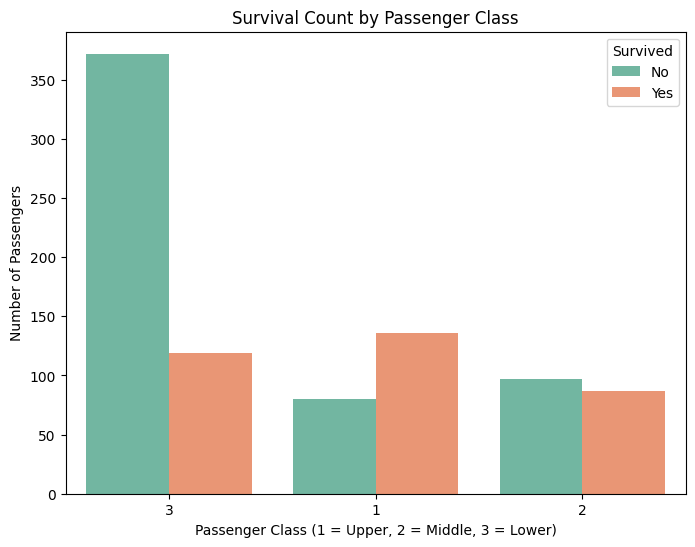

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assumes 'train' DataFrame is already loaded (e.g., from train.csv)
# Make sure Pclass is treated as a category
train['Pclass'] = train['Pclass'].astype(str)

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
